# Домашнее задание

In [1]:
# Импортируем библиотеки

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [3]:
# Удаляем ненужный столбец
data.drop('Index', axis = 1, inplace = True)
data.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [4]:
data.shape

(500, 3)

## 1. Создайте колонку BMI (индекс массы тела), которая считается по формуле: BMI = (Вес в кг) / (Рост в метрах)^2. Учтите, что ваш текущий рост в см, не метры.

In [5]:
data['BMI']=data['Weight']/(data['Height']/100)**2
data

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240
...,...,...,...,...
495,Female,150,153,68.000000
496,Female,184,121,35.739603
497,Female,141,136,68.407022
498,Male,150,95,42.222222


## 2. Посчитайте среднее значение, медиану, и моду для роста, веса, BMI.

In [6]:
data[['Height','Weight','BMI']].agg(['mean','median'])

,Height,Weight,BMI
mean,169.944,106.0,37.765284
median,170.500,106.0,36.956941


In [7]:
data[['Height','Weight','BMI']].mode()

,Height,Weight,BMI
0,188.0,50,37.34559
1,NaN,80,NaN
2,NaN,104,NaN


## 3. Найдите range (диапазон, т.е. макс - мин), и стандартное отклонение для роста, веса, BMI. И расскажите что это означает.

In [9]:
data[['Height','Weight','BMI']].agg(['std'])
print(f"Range Height:{max(data['Height'])-min(data['Height'])}")
print(f"Range Weight:{max(data['Weight'])-min(data['Weight'])}")
print(f"Range BMI:{max(data['BMI'])-min(data['BMI'])}")

Range Height:59
Range Weight:110
Range BMI:66.09960147016888


## 4. Найдите 15-й процентиль и 90-й процентиль для роста, веса, BMI. Что это означает простыми словами?

In [13]:
print(f"15-й процентиль для роста:{np.percentile(data['Height'],15)}")
print(f"90-й процентиль для роста:{np.percentile(data['Height'],90)}")

15-й процентиль для роста:150.0
90-й процентиль для роста:191.0


In [14]:
print(f"15-й процентиль для веса:{np.percentile(data['Weight'],15)}")
print(f"90-й процентиль для  веса:{np.percentile(data['Weight'],90)}")

15-й процентиль для веса:67.0
90-й процентиль для  веса:150.10000000000002


In [15]:
print(f"15-й процентиль для BMI:{np.percentile(data['BMI'],15)}")
print(f"90-й процентиль для BMI:{np.percentile(data['BMI'],90)}")

15-й процентиль для BMI:22.76186876086348
90-й процентиль для BMI:57.70327373948936


## 5. Создайте гистограмму для роста, веса, BMI.

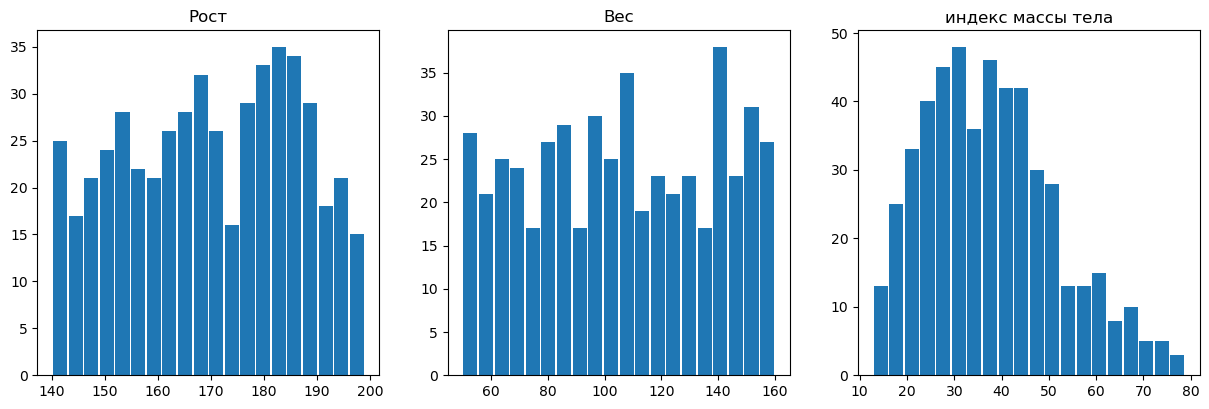

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(top=0.8)

axs[0].hist(data['Height'], bins=20, rwidth=0.9)
axs[0].set_title('Рост')

axs[1].hist(data['Weight'], bins=20, rwidth=0.9)
axs[1].set_title('Вес')

axs[2].hist(data['BMI'], bins=20, rwidth=0.9)
axs[2].set_title('индекс массы тела')

plt.show()

## 6. Создайте box plot для роста, веса, BMI в разрезе пола. Что вы видите, опишите?

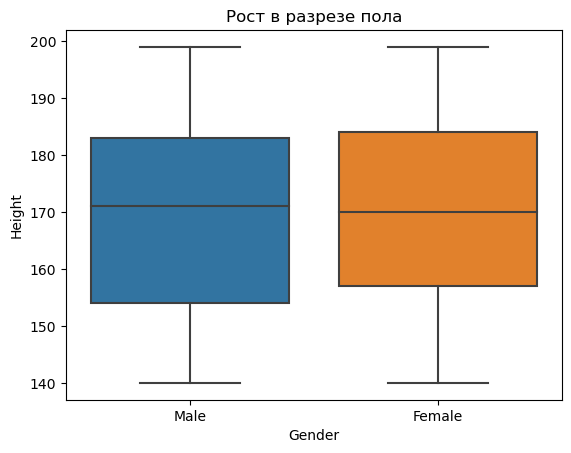

In [63]:
sns.boxplot(data,y='Height',x='Gender')
plt.title('Рост в разрезе пола')
plt.show()

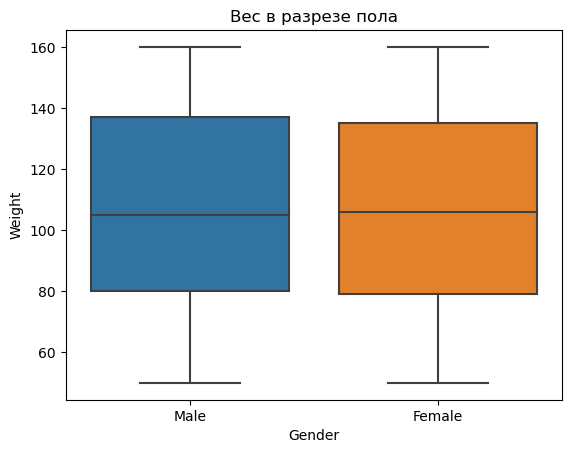

In [62]:
sns.boxplot(data,y='Weight',x='Gender')
plt.title('Вес в разрезе пола')
plt.show()

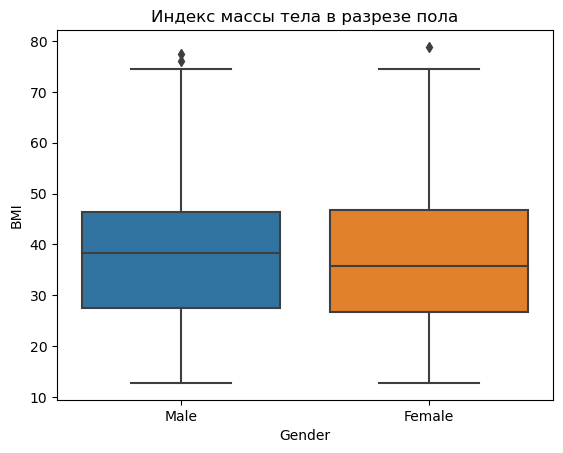

In [61]:
sns.boxplot(data,y='BMI',x='Gender')
plt.title('Индекс массы тела в разрезе пола')
plt.show()

## 7. Посчитайте межквартильный размах для роста, веса, BMI.

In [18]:
print(f"Mежквартильный размах для роста:{np.percentile(data['Height'],75)-np.percentile(data['Height'],25)}")

Mежквартильный размах для роста:28.0


In [19]:
print(f"Mежквартильный размах для веса:{np.percentile(data['Weight'],75)-np.percentile(data['Weight'],25)}")

Mежквартильный размах для веса:56.0


In [17]:
print(f"Mежквартильный размах для BMI:{np.percentile(data['BMI'],75)-np.percentile(data['BMI'],25)}")

Mежквартильный размах для BMI:19.221114685707498


## 8. Есть ли в данных какие-то выбросы для роста, веса, BMI? Как можно их найти? Используя межквартильный размах? Удалите все такие выбросы из таблицы.

In [33]:
Hq1, Hq3 = np.percentile(data['Height'],[25,75])

new_data = data[(data['Height']>=Hq1)&(data['Height']<=Hq3)]
new_data.reset_index()

,index,Gender,Height,Weight,BMI
0,0,Male,174,96,31.708284
1,8,Male,174,90,29.726516
2,9,Female,169,103,36.063163
3,11,Female,159,80,31.644318
4,16,Female,157,110,44.626557
...,...,...,...,...,...
257,489,Female,179,150,46.815018
258,490,Female,164,59,21.936347
259,493,Female,170,53,18.339100
260,496,Female,184,121,35.739603


In [34]:
Wq1, Wq3 = np.percentile(data['Weight'],[25,75])

new_data = data[(data['Weight']>=Wq1)&(data['Weight']<=Wq3)]
new_data.reset_index()

,index,Gender,Height,Weight,BMI
0,0,Male,174,96,31.708284
1,1,Male,189,87,24.355421
2,2,Female,185,110,32.140248
3,3,Female,195,104,27.350427
4,5,Male,189,104,29.114526
...,...,...,...,...,...
248,494,Male,152,98,42.416898
249,496,Female,184,121,35.739603
250,497,Female,141,136,68.407022
251,498,Male,150,95,42.222222


In [35]:
Bq1, Bq3 = np.percentile(data['BMI'],[25,75])

new_data = data[(data['BMI']>=Bq1)&(data['BMI']<=Bq3)]
new_data.reset_index()

,index,Gender,Height,Weight,BMI
0,0,Male,174,96,31.708284
1,2,Female,185,110,32.140248
2,3,Female,195,104,27.350427
3,4,Male,149,61,27.476240
4,5,Male,189,104,29.114526
...,...,...,...,...,...
245,488,Male,198,136,34.690338
246,494,Male,152,98,42.416898
247,496,Female,184,121,35.739603
248,498,Male,150,95,42.222222


In [36]:
new_data = data[(data['Height']>=Hq1)&(data['Height']<=Hq3)&
                (data['Weight']>=Wq1)&(data['Weight']>=Wq3)&
                (data['BMI']>=Bq1)&(data['BMI']>=Bq3)]
new_data.reset_index()

,index,Gender,Height,Weight,BMI
0,19,Male,172,139,46.984857
1,28,Female,163,159,59.844179
2,29,Male,179,152,47.439219
3,34,Female,157,153,62.071484
4,38,Female,171,152,51.981806
5,65,Female,179,158,49.311819
6,81,Female,166,140,50.805632
7,90,Female,178,154,48.604974
8,95,Female,170,156,53.979239
9,97,Male,160,139,54.296875
